In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = yf.download("TSLA")

[*********************100%%**********************]  1 of 1 completed


In [3]:
# calculate periodic daily return
returns = np.log(1+df['Adj Close'].pct_change())

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,192.110001,194.729996,187.279999,188.130005,188.130005,95498600
2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000
2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800
2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600


In [8]:
returns.dropna()

Date
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
2010-07-07   -0.019431
                ...   
2024-02-12   -0.028506
2024-02-13   -0.022089
2024-02-14    0.025167
2024-02-15    0.060353
2024-02-16   -0.002498
Name: Adj Close, Length: 3432, dtype: float64

In [9]:
mu, sigma = returns.mean(), returns.std()

In [12]:
# simulated returns on next year of trading
sim_rets = np.random.normal(mu, sigma, 252)

In [15]:
initial = df['Adj Close'].iloc[-1]

In [17]:
sim_prices = initial * (sim_rets + 1).cumprod()

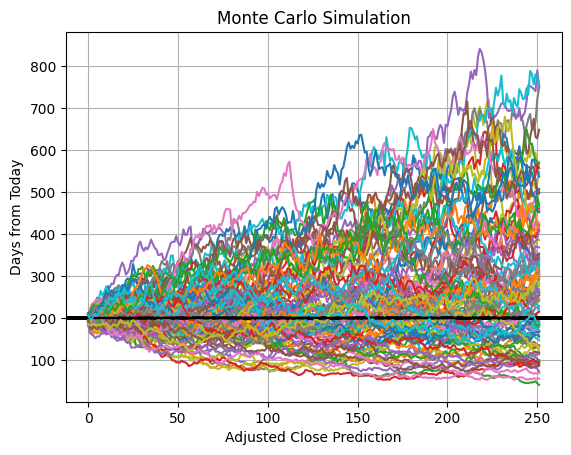

In [23]:
for i in range(100):
    sim_rets = np.random.normal(mu, sigma, 252) 
    sim_prices = initial * (sim_rets + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.title('Monte Carlo Simulation')
    plt.xlabel('Adjusted Close Prediction')
    plt.ylabel('Days from Today') 
    plt.grid(True)
    plt.plot(sim_prices)